# Ïù¥ÎØ∏ÏßÄÏ≤òÎ¶¨

In [3]:
# !pip install opencv-python
# !pip install matplotlib

## Ïù¥ÎØ∏ÏßÄ Î∞ùÍ∏∞ Í≥ÑÏÇ∞ Î∞è ÌèâÍ∞Ä

ÌèâÍ∑† Î∞ùÍ∏∞: 128.14
‚òÄÔ∏èÏù¥ÎØ∏ÏßÄÍ∞Ä ÎÑàÎ¨¥ Î∞ùÏäµÎãàÎã§.


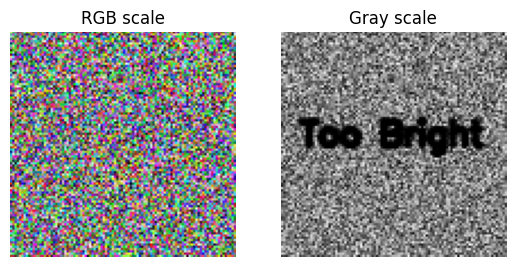

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # RGB -> BGR

# 1. numpyÎ°ú Ï¶âÏÑù Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±
img = np.random.randint(0, 256, (100, 100, 3), dtype = np.uint8)
# 2. Í∑∏Î†àÏù¥Ïä§ÏºÄÏùº Î≥ÄÌôò (ÏÉâÏÉÅ -> Î∞ùÍ∏∞)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Ïù¥ÎØ∏ÏßÄÏùò ÌèâÍ∑† Î∞ùÍ∏∞Î•º Í≥ÑÏÇ∞
mean_brighteness = np.mean(gray)
print(f"ÌèâÍ∑† Î∞ùÍ∏∞: {mean_brighteness:.2f}")

if mean_brighteness < 127.5:    
    print("üåÉÏù¥ÎØ∏ÏßÄÍ∞Ä ÎÑàÎ¨¥ Ïñ¥Îë°ÏäµÎãàÎã§.")
    gray = cv2.putText(gray.copy(), "Too Dark", (10,50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255), 2 ,cv2.LINE_AA)
elif mean_brighteness > 127.9:
    print("‚òÄÔ∏èÏù¥ÎØ∏ÏßÄÍ∞Ä ÎÑàÎ¨¥ Î∞ùÏäµÎãàÎã§.")
    gray = cv2.putText(gray.copy(), "Too Bright", (8,50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0), 2 ,cv2.LINE_AA)
else:
    print("üòäÏ†ïÏÉÅ Ïù¥ÎØ∏ÏßÄ ÏûÖÎãàÎã§.")

plt.subplot(1, 2, 1)
plt.title("RGB scale")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gray scale")
plt.imshow(gray, cmap="gray")
plt.axis('off')
plt.show()


## HSV ÏôÄ Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨

#### H - HUE(ÏÉâÏÉÅ) 0 ~ 179 (ÏõêÎûòÎäî 360 -> OpenCV 180Îã®Í≥ÑÎ°ú Ï§ÑÏûÑ), 2Î°ú ÎÇòÎàî
- Îπ®Í∞ï : 0, 179 Î∂ÄÍ∑º (ÏñëÎÅù)
- ÎÖ∏Îûë : 30
- ÌïòÎäò : 90
- ÌååÎûë : 120
- Î≥¥Îùº : 150
#### S - Saturation(Ï±ÑÎèÑ)
- 0 ~ 255 : Í∞íÏù¥ ÎÇÆÏùÑ ÏàòÎ°ù ÌöåÏÉâ(ÌÉÅÌïúÏÉâ) ÎÜíÏùÑÏàòÎ°ù ÏõêÏÉâ
#### V - Value(Î™ÖÎèÑ)
- 0 ~ 255 : ÏÉâÏùò Î∞ùÍ∏∞, ÎÇÆÏùÑ ÏàòÎ°ù Í≤ÄÏ†ï(0) ÎÜíÏùÑ ÏàòÎ°ù Î∞ùÏùÄÏÉÅÌÉú(255) 

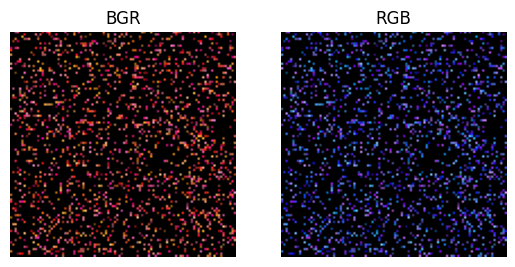

In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. numpyÎ°ú Ï¶âÏÑù Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±
img = np.random.randint(0, 256, (100, 100, 3), dtype = np.uint8)

hsv_img = cv2.cvtColor(img , cv2.COLOR_BGR2HSV)

# ÌååÎûÄÏÉâ Î≤îÏúÑÎ•º Ï†ïÏùò(HSV)
lower_blue = np.array([100, 100, 100]) 
upper_blue = np.array([140, 255, 255]) 

# ÎßàÏä§ÌÅ¨
mask = cv2.inRange(hsv_img, lower_blue, upper_blue)

blue_region = cv2.bitwise_and(img, img, mask = mask)
blue_region_rgb = cv2.cvtColor(blue_region, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(blue_region)
plt.title("BGR")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(blue_region_rgb)
plt.title("RGB")
plt.axis("off")
plt.show()


(100, 100, 3)


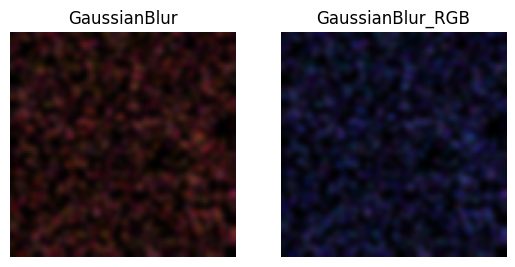

In [96]:
# Í∞ÄÏö∞ÏãúÏïà Î∏îÎü¨ Ï†ÅÏö© (ÎÖ∏Ïù¥Ï¶àÏ†úÍ±∞)
blurred = cv2.GaussianBlur(blue_region,(7,7),0)
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

print(blurred.shape)

plt.subplot(1,2,1)
plt.imshow(blurred)
plt.title("GaussianBlur")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(blurred_rgb)
plt.title("GaussianBlur_RGB")
plt.axis("off")

plt.show()

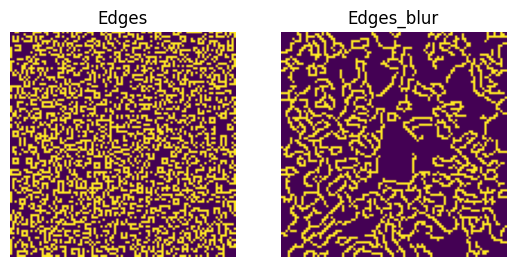

In [97]:
edges = cv2.Canny(blue_region_rgb,50, 150) # 50Î≥¥Îã§ ÏûëÏúºÎ©¥ Í∞íÏùÑ Î¨¥Ïãú, 150Î≥¥Îã§ ÌÅ¥Í≤ΩÏö∞ Í∞ïÌïòÍ≤å Ïó£ÏßÄÎ°ú Ïù∏Ï†ï
edges_blur = cv2.Canny(blurred_rgb,50, 150) # 50Î≥¥Îã§ ÏûëÏúºÎ©¥ Í∞íÏùÑ Î¨¥Ïãú, 150Î≥¥Îã§ ÌÅ¥Í≤ΩÏö∞ Í∞ïÌïòÍ≤å Ïó£ÏßÄÎ°ú Ïù∏Ï†ï

plt.subplot(1,2,1)
plt.imshow(edges)
plt.title("Edges")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(edges_blur)
plt.title("Edges_blur")
plt.axis("off")

plt.show()